# Исследование надежности заемщиков

## Откроем таблицу и изучим общую информацию о данных

**Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`. Путь к файлу:**
`/datasets/messages.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv(`/datasets/messages.csv`)

**Выведем первые 10 строчек датафрейма `data` на экран.**

In [2]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Узнаем уровень разброса значений в исследуемых данных borrowers. Для этого применим метод describe()**

In [4]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


**Описание данных**
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

**Выводы:** 
1. В двух столбцах есть пропущенные значения. Один из них `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.
2. Другой из них — `days_employed`. В столбце `days_employed` мы наблюдаем отрицательные значения. Также необходимо проверить данный столбце на наличие артефактов, так как среднее по столбцу - 63046.497661 дня
3. В столбце children находится min значение - 1 и значение max для этого столбца 20, что отклоняется от общего. Необходимо проверить столбец children на наличие артефактов и некорректных значений.
4. Также минимальное значение возраста значится как "0".

## Предобработка данных

### Обработка пропусков

In [5]:
data.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Пропуски обнаружены в столбцах days_employed и total_income. Они носят неслучайный характер. если люди не работают, то и дохода, по крайней мере, официального не получают. Проверим, в одних и тех же строках наблюдаются значения NaN?

In [6]:
data[(data['total_income'].isnull() == True) & (data['days_employed'].isnull() == True)]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


На сумму дохода сильнее всего влияет тип занятости, поэтому заполниv пропуски в этом столбце  медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [7]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

Пропуски наблюдаются в одних и тех же строках. Перед тем как перейти к удалению пропусков, необходимо разобраться со столбцами children и days_employed

### Обработка аномальных значений

**В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [8]:
data['days_employed'] = data['days_employed'].abs()

**Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.**

In [9]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получаются аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится вам для исследования.

**Выведем перечень уникальных значений столбца `children`.**

In [10]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [11]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [12]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [13]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Убедимся, что все пропуски заполнены. Проверим себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [14]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [15]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру. Проверим остальные столбцы.**

In [16]:
data['education'] = data['education'].str.lower()

**Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.**

In [17]:
data.duplicated().sum()

71

In [18]:
data = data.drop_duplicates()

### Категоризация данных

**На основании диапазонов, указанных ниже, создим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'k'`;
- 30001–50000 — `'I'`;
- 150001–200000 — `'E'`;
- 100001–150000 — `'D'`;
- 50001–100000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначим категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используем собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [19]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'K'
        elif 30001 <= income <= 50000:
            return 'I'
        elif 150001 <= income <= 200000:
            return 'E'
        elif 100001 <= income <= 150000:
            return 'D'
        elif 50001 <= income <= 100000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [20]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [21]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используем собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучим данные в столбце `purpose` и определим, какие подстроки помогут нам правильно определить категорию.**

In [22]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуем данные

### Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [24]:
data.groupby('children')['debt'].agg(['count','sum','mean'])

,count,sum,mean
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


In [25]:
data_children = data[(data['children'] != 4) & (data['children'] != 5)]# уберем данные с 4 и 5 детьми из анализа

<AxesSubplot:xlabel='children'>

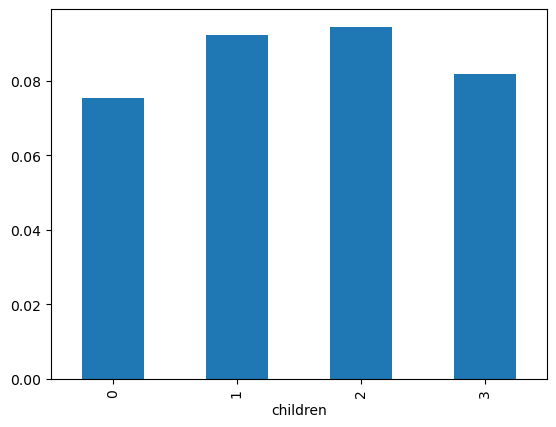

In [26]:
data_children.groupby('children')['debt'].mean().plot(kind='bar')# построим график зависимости количества детей от средней наличии задолженности по категории

**Вывод:** Зависимость невозврата кредита растет до двух детей у заемщиков. При наличии третьего ребенка эта зависимость значительно уменьшается. Из расчетных данных исключили заемщиков с четырьмя и пятью детьми, из-за недостаточного количество выборки данных по ним

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [27]:
data.groupby('family_status')['debt'].agg(['count','sum','mean'])

,count,sum,mean
family_status,,,
Не женат / не замужем,2796,273,0.097639
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606


<AxesSubplot:xlabel='family_status'>

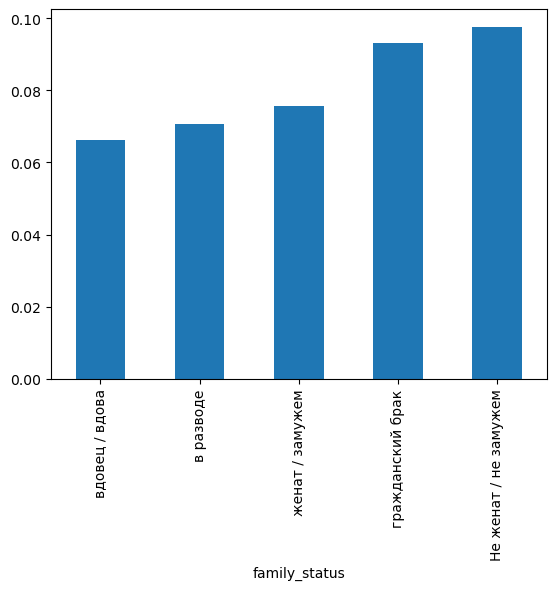

In [28]:
data.groupby('family_status')['debt'].mean().sort_values().plot(kind='bar')# построим график зависимости статуса от средней наличии задолженности по категории

**Вывод:** Заемщики которые находились в официальных отношениях имеею в среднем меньшее количество задолженностей, чем те кто не оформил отношения официально, либо не имеет их совсем.

### Есть ли зависимость между возратом заемщика и возвратом кредита в срок?

<AxesSubplot:xlabel='dob_years'>

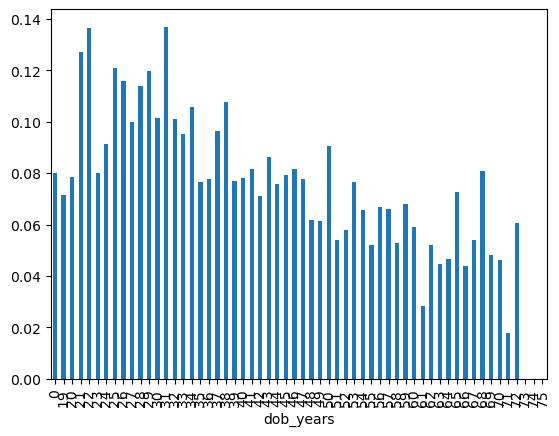

In [29]:
data.groupby('dob_years')['debt'].mean().plot(kind='bar')# построим график зависимости между возратом заемщика и средней наличии задолженности по категории

**Вывод:** Больше всего задолженности у людей 21-22 лет, 31 года. Оптимально от 23 до 30 и от 32

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [30]:
data.groupby('total_income_category')['debt'].agg(['count','sum','mean'])

,count,sum,mean
total_income_category,,,
A,25,2,0.080000
B,5014,354,0.070602
C,4073,331,0.081267
D,7110,619,0.087060
E,4738,403,0.085057
I,349,21,0.060172
K,22,2,0.090909


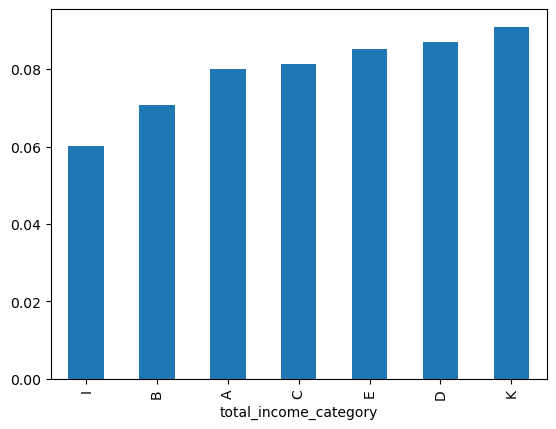

In [33]:
data.groupby('total_income_category')['debt'].mean().sort_values().plot(kind='bar');# построим график зависимости статуса от средней наличии задолженности по категории

**Вывод:** Люди с доходом более 200 000 руб. и менее 1 000 000 руб. имееют меньше всего задолженностей по кредитам

Чем выше доход, тем меньше задолжености среди клиентов.

### Как разные цели кредита влияют на его возврат в срок?

In [31]:
data.groupby('purpose_category')['debt'].agg(['count','sum','mean'])# добавил количество(sum), долю просрочек

,count,sum,mean
purpose_category,,,
операции с автомобилем,4279,400,0.093480
операции с недвижимостью,10751,780,0.072551
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118


<AxesSubplot:xlabel='purpose_category'>

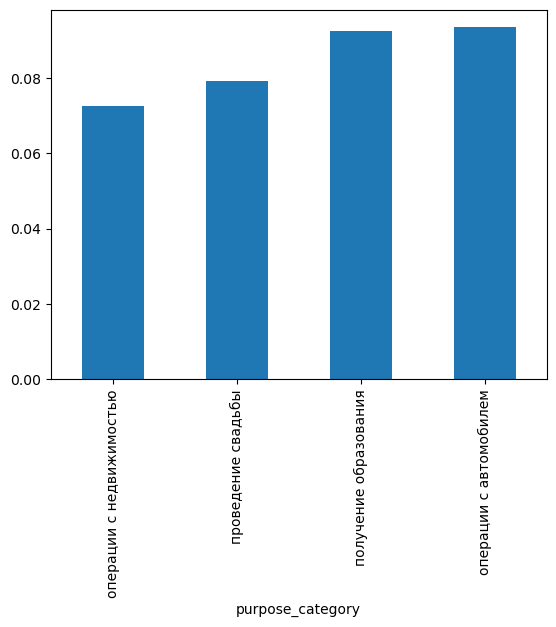

In [32]:
data.groupby('purpose_category')['debt'].mean().sort_values().plot(kind='bar');# построим график зависимости статуса от средней наличии задолженности по категории

**Вывод:** Заемщики берущие кредит на автомобиль и получение образование реже отдают его с срок

### Приведем возможные причины появления пропусков в исходных данных.

Пропуска совпадают в двух колонка 'ежемесячный доход' и 'общий трудовой стаж в днях'. Притом в колонке трудового стажа были отрицательные значения, которые исправляли на положительные. Причины пропуска могут быть:
1. Ошибка в подсчете данных этих колонок. Машинная ошибка.
2. Неправильным заполнением. Человеческая ошибка.


### Объясним, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца income_type. Методов сфокусирован на корректировку данных таким образом, чтобы известные модели работали лучше. Количество данных не уменьшаеться, а корретируется.

Медиана — значение, которое разбивает данные, отсортированные по порядку увеличения значений, на две равные части. 
Это значит, что медиана показывает центральное значение в выборке, если наблюдений нечетное количество и среднее арифметическое двух значений, если количество наблюдений в выборке четно. Меньше зависит от наличия "всплесков" в элементах. В более общем случае медиану можно найти, упорядочив элементы выборки по возрастанию или убыванию и взяв средний элемент.

## Общий вывод.

Провели исследование статистики о платёжеспособности клиентов. Пришли к следующим выводам:
1. Необходимо разобраться откуда возникли пропуски в двух колонках 'ежемесячный доход' и 'общий трудовой стаж в днях'.
2. Дополнить данными по категориям с заемщиками с 4 и 5 детьми, с доходом больще 1 млн и меньше 30 тыс.

Предварительно можно сделать вывод: 
1. Рисковые цели выдачей кредитных средств - покупка недвижимости и автомобиля. Однако, данные цели подкреплены залогом, стоимость высока, соответственно и выгода банка выше.
2. Люди, находящиеся в гражданском браке более ответственные, чем находящиеся в официальных отношениях, однако супруги, оформившие официальные отношения - выступают автоматически в качестве созаемщика, что защищает банк
3. Чем выше уровень дохода, тем меньше случаев задолжености среди клиентов. При рассмотрении данных клиентов с суммой дохода от 50 тыс до 1 млн.
4. Количество невозратв по кредитом растет до 2 детей, но наличие третьего ребенка уменьшает риск невозрата

Попробуем нарисовать портет идеального заёмщика:
Идеальный заёмщик в возрасте 36-61 лет, состоящий в официальном браке с 3 детьми, доход средний 200 000 рублей - 1 000 000 рублей

Таким образом, семейное положение и количество детей влияет на факт погашения кредита